In [8]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

from scipy.stats import zscore

import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('kahuna.csv')

In [3]:
data.head(3)

,Entity,Year,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport,...,Death_under5,Death_5-14,Death_50-69,Death_70+,Death_15-49,Urban%,Child Mortality,Population,GDP,Forest area
0,Albania,1991,17.613636,4228256,1.2889,4011691.0,9030000.0,0.0,0.02,500000.0,...,172.433312,5.975427,271.661092,512.126572,60.714220,36.700,3.93,119.225912,3496.580246,786850.0
1,Albania,1995,16.789055,2066496,0.6638,4861321.1,7480000.0,43.4,0.01,600000.0,...,127.035936,4.580403,240.740486,469.406670,49.692924,38.911,3.39,116.342482,4471.871070,779050.0
2,Albania,1996,16.588451,1993216,0.6432,4569702.9,7280000.0,43.2,0.01,600000.0,...,113.537473,4.373679,255.560407,491.357876,52.069689,39.473,3.26,115.621642,4909.228105,777100.0


In [4]:
df = data.drop(columns = ['Entity'])

In [6]:
data.isnull().sum().sum()

0

In [7]:
df.shape

(2409, 25)

In [9]:
ss = StandardScaler()
df_sc = ss.fit_transform(df)

In [21]:
from sklearn.cluster import AgglomerativeClustering 

model = AgglomerativeClustering(distance_threshold=None, affinity='euclidean',  linkage='average', n_clusters =3)


model.fit(df_sc)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [22]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
df['labels'] = model.labels_

In [24]:
df.labels.value_counts(normalize=True)

0    0.980075
1    0.015774
2    0.004151
Name: labels, dtype: float64

In [25]:
df_clust = df.groupby(['labels'])

In [26]:
df.shape

(2409, 26)

In [27]:
df_clust.head(100)

,Year,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport,Death_rate_ambient_ozone_pol,...,Death_5-14,Death_50-69,Death_70+,Death_15-49,Urban%,Child Mortality,Population,GDP,Forest area,labels
0,1991,17.613636,4228256,1.2889,4.011691e+06,9.030000e+06,0.00,0.02,500000.0,4.360865,...,5.975427,271.661092,512.126572,60.714220,36.700,3.93,119.225912,3496.580246,786850.0,0
1,1995,16.789055,2066496,0.6638,4.861321e+06,7.480000e+06,43.40,0.01,600000.0,3.420271,...,4.580403,240.740486,469.406670,49.692924,38.911,3.39,116.342482,4471.871070,779050.0,0
2,1996,16.588451,1993216,0.6432,4.569703e+06,7.280000e+06,43.20,0.01,600000.0,3.079414,...,4.373679,255.560407,491.357876,52.069689,39.473,3.26,115.621642,4909.228105,777100.0,0
3,1997,15.081361,1531552,0.4941,4.431657e+06,6.510000e+06,45.20,0.01,500000.0,3.023884,...,4.414006,269.448518,521.197486,57.988035,40.035,3.13,114.900766,4400.577827,775150.0,0
4,1998,15.965796,1744064,0.5607,4.344062e+06,6.810000e+06,49.60,0.01,700000.0,2.600204,...,4.493629,280.472022,547.315668,64.973478,40.601,2.99,114.179927,4819.387534,773200.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,2009,17.873230,1612816599,1.3244,1.029303e+09,2.355660e+09,977.00,5.10,177300000.0,15.732191,...,2569.317979,227780.723260,283271.428709,63666.966350,30.587,6.14,409.568920,3956.359016,69305500.0,1
940,2010,17.747732,1677887585,1.3594,1.046897e+09,2.457760e+09,1933.70,5.03,191300000.0,14.527260,...,2495.743620,246769.182577,285501.682170,67464.211929,30.930,5.82,415.136995,4234.979573,69496000.0,1
941,2011,17.817040,1780129996,1.4238,1.063136e+09,2.800430e+09,1484.57,5.16,207200000.0,15.012409,...,2637.772394,271023.975463,315355.091989,72481.798439,31.276,5.51,420.520700,4399.888240,69762400.0,1
942,2012,18.124674,1963586045,1.5513,1.088986e+09,2.943690e+09,1638.45,5.61,219200000.0,15.378279,...,2797.501837,294252.459933,354389.323684,77154.186496,31.634,5.20,425.731367,4583.173199,70028800.0,1


In [28]:
df_clust.mean().T

labels,0,1,2
Year,2.002232e+03,1.999658e+03,2.008500e+03
Deaths %,1.062767e+01,1.979769e+01,1.995926e+01
CO2 Emissions,1.594117e+08,1.929929e+09,7.782466e+09
CO2 Emissions Per Cap,5.319687e+00,1.608011e+00,5.715960e+00
Food Emissions,1.162970e+08,1.221878e+09,2.233728e+09
Total GHG,2.560817e+08,2.598242e+09,8.920881e+09
Consumption of Ozone,1.657603e+03,3.856255e+04,2.394575e+04
Shared CO2 Emissions,5.803219e-01,7.509211e+00,2.394500e+01
Transport,3.674235e+07,1.369684e+08,5.314000e+08
Death_rate_ambient_ozone_pol,2.311975e+00,1.684984e+01,1.379683e+01


In [29]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

from scipy.spatial.distance import pdist

In [30]:
Z = linkage(df_sc, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_sc))

c

0.9433334428983807

CPU times: user 15.2 s, sys: 1.16 s, total: 16.3 s
Wall time: 17 s


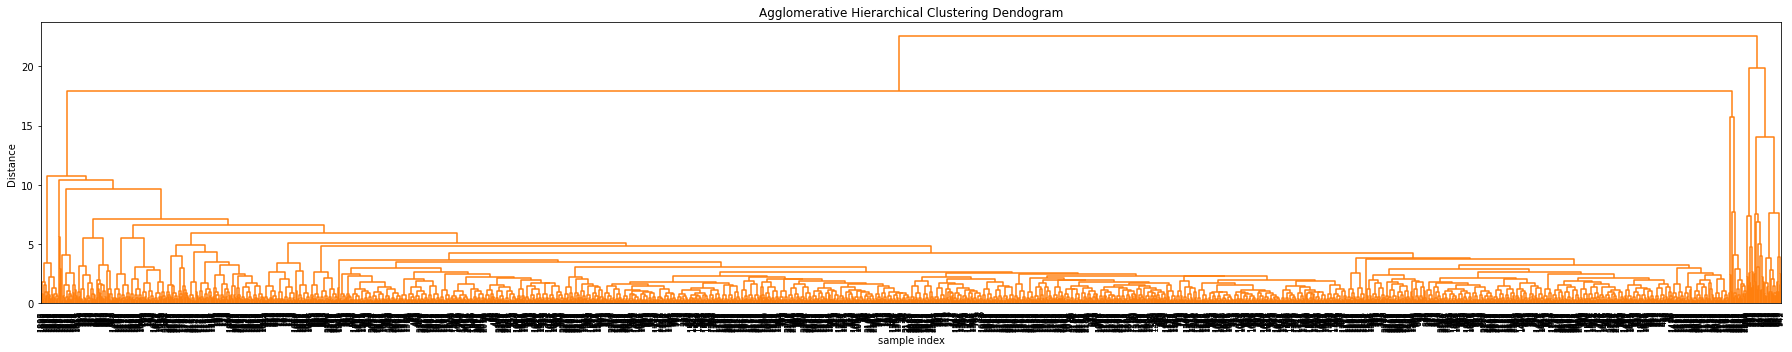

In [31]:
%%time
plt.figure(figsize=(25, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, truncate_mode ='level' ,leaf_font_size=8. )
plt.tight_layout()

In [32]:
Z = linkage(df_sc, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(df_sc))

c

0.9115477910880342

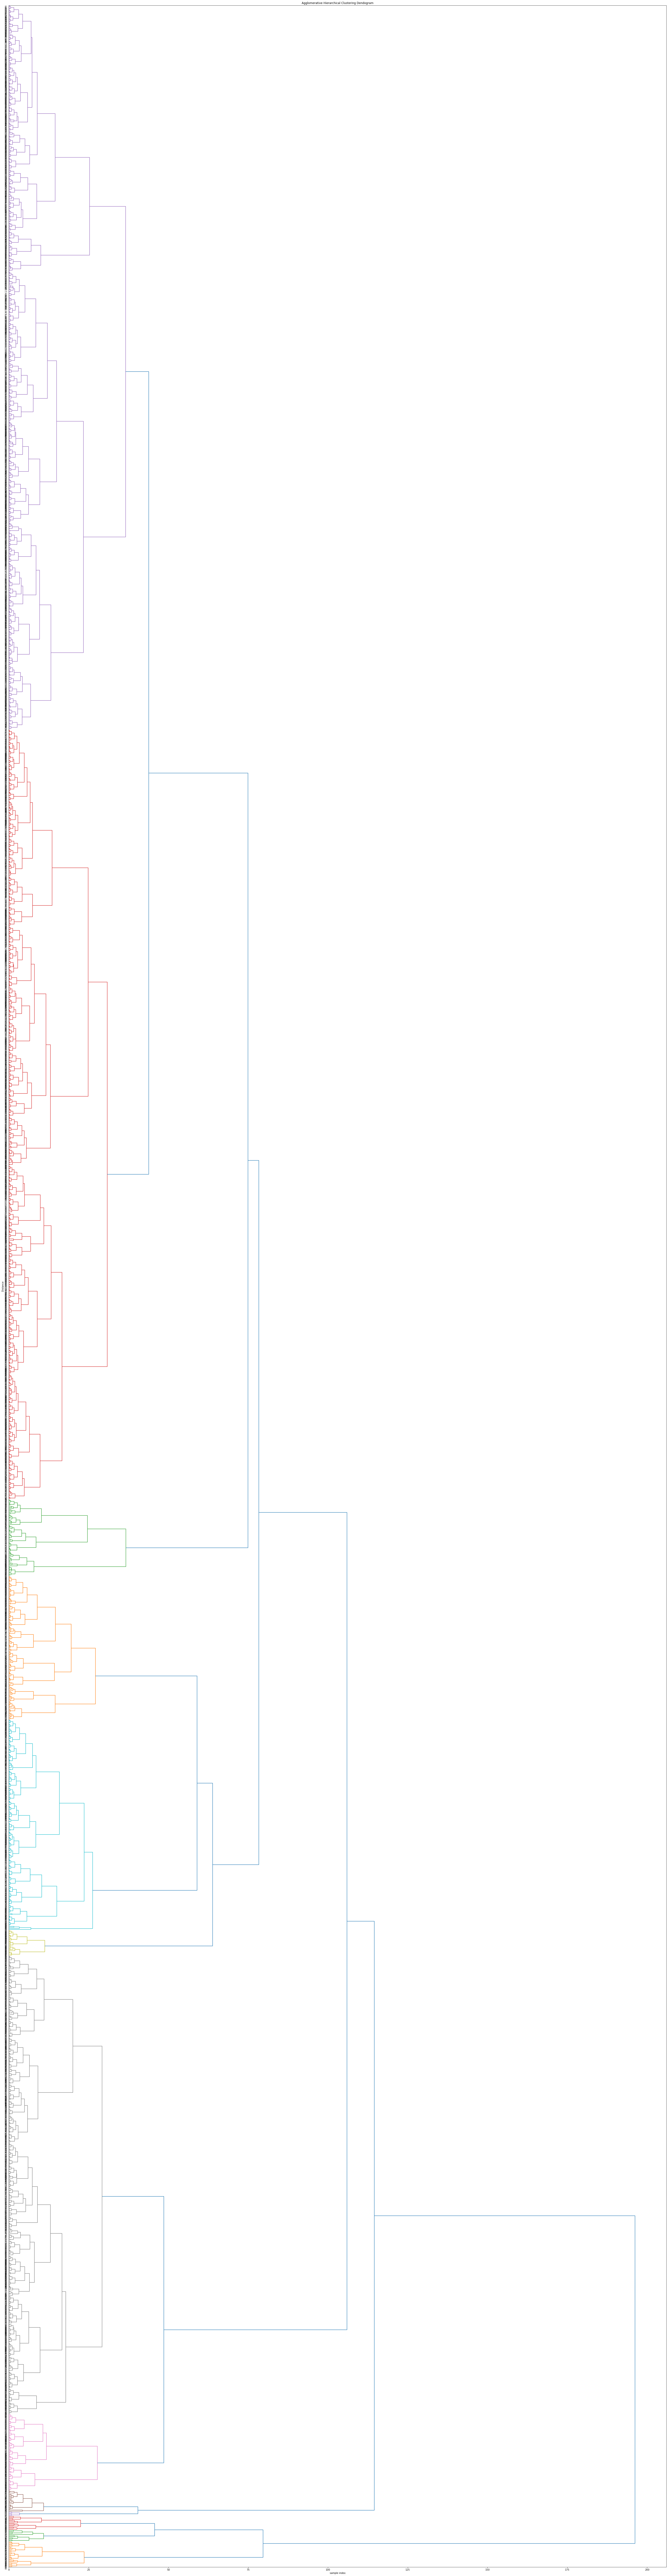

CPU times: user 21.7 s, sys: 1.8 s, total: 23.5 s
Wall time: 24.2 s


In [48]:
%%time
plt.figure(figsize=(50, 200))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
plt.xlim([15,50])
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8., orientation="right" )
plt.show()

In [34]:
Z = linkage(df_sc, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(df_sc))

c

0.7105637191106653

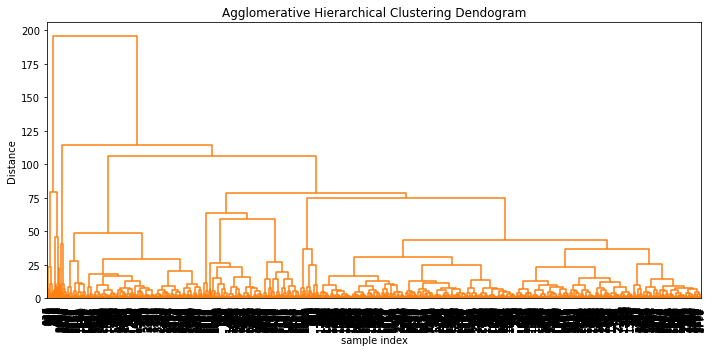

In [35]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()